# Initializing environment

In [1]:
import numpy as np
import os

# To make the output stable across other runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_farmer_income_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Loading dataset

In [3]:
import pandas as pd
df_train = pd.read_excel('Pearl Challenge data with dictionary.xlsx', sheet_name='TrainData')
df_test = pd.read_excel('Pearl Challenge data with dictionary.xlsx', sheet_name='TestData')

In [4]:
df_train.head()

,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income
0,1002818465057450,MADHYA PRADESH,CENTRAL,M,BARELI,464668,RAISEN,Seoni,M,NaN,...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,97.24,19.50,0.95,22.380262,33.527178,Poor,0.773129,0.00,1360000
1,1012300674433870,BIHAR,EAST,M,BANDRA,848125,MUZAFFARPUR,Namapur,M,NaN,...,DECCAN PLATEAU (TELANGANA) AND EASTERN GHATS ...,73.96,16.76,0.97,24.630262,37.173626,Poor,0.454140,0.00,807200
2,1013472263587380,MADHYA PRADESH,CENTRAL,M,MALHARGARH,458556,MANDSAUR,Billaud,M,NaN,...,CENTRAL HIGHLANDS ( MALWA ) GUJARAT PLAIN AND...,90.05,22.44,0.95,19.493313,28.848462,Poor,0.657040,0.00,500000
3,1019525480704050,MAHARASHTRA,WEST,M,RENAPUR,413527,LATUR,Renapur,M,NaN,...,DECCAN PLATU HOT SEMI-ARID ECO-REGION,94.64,21.48,0.98,31.836367,48.852156,Average,0.235615,2.49,558000
4,1021915867444260,MADHYA PRADESH,CENTRAL,F,KHURAI,470117,SAGAR,Singhpur,M,NaN,...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,95.90,18.93,0.97,21.327371,31.820817,Poor,0.207264,0.00,800000


In [5]:
df_train.describe()

,FarmerID,Zipcode,No_of_Active_Loan_In_Bureau,Avg_Disbursement_Amount_Bureau,Non_Agriculture_Income,Total_Land_For_Agriculture,K022-Proximity to nearest mandi (Km),K022-Proximity to nearest railway (Km),KO22-Village score based on socio-economic parameters (0 to 100),K022-Seasonal Average Rainfall (mm),...,Rabi Seasons Agricultural performance in 2020,Rabi Seasons Agricultural Score in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income
count,4.797000e+04,47970.000000,47970.000000,2.718000e+04,4.797000e+04,47899.000000,47970.000000,47970.000000,47970.000000,47970.000000,...,47970.000000,47970.000000,47970.000000,47970.000000,47970.000000,47970.000000,47970.000000,47970.000000,47970.000000,4.797000e+04
mean,5.488529e+15,486844.412529,1.780196,2.463834e+05,2.806439e+05,9.952977,11.502610,15.107913,37.387913,1394.703558,...,23.828276,25.177085,84.655071,21.216232,0.930509,24.762485,37.387913,0.683805,2.850370,1.222255e+06
std,2.602973e+15,120222.366317,2.733938,7.111157e+05,1.707941e+06,6.903007,7.515967,13.984214,7.484105,424.028028,...,12.140449,9.083251,14.777610,7.074566,0.058456,4.617983,7.484105,1.980722,6.126023,2.073935e+06
min,1.000336e+15,122103.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,8.177678,530.370000,...,0.000000,0.000000,22.370000,0.560000,0.430000,6.738640,8.177678,0.000000,0.000000,2.900000e+04
25%,3.210170e+15,445302.250000,0.000000,5.790262e+04,0.000000e+00,5.000000,6.200000,3.400000,32.980125,1057.190000,...,14.650000,18.820000,74.770000,17.410000,0.920000,22.042710,32.980125,0.156027,0.000000,7.200000e+05
50%,5.488973e+15,483119.000000,1.000000,1.290978e+05,1.000000e+05,10.000000,10.700000,11.400000,37.776894,1375.800000,...,23.150000,26.410000,89.120000,20.370000,0.950000,25.002501,37.776894,0.304050,0.460000,9.500000e+05
75%,7.750388e+15,521109.000000,2.000000,2.840252e+05,2.500000e+05,12.000000,15.975000,23.600000,41.990679,1687.490000,...,32.310000,31.530000,95.380000,25.180000,0.970000,27.602570,41.990679,0.583235,3.420000,1.295000e+06
max,9.999402e+15,855117.000000,62.000000,8.000000e+07,7.128230e+07,151.000000,44.200000,93.700000,100.000000,2569.100000,...,67.820000,57.620000,157.700000,56.880000,1.000000,63.396566,100.000000,112.603896,198.550000,8.000000e+07


In [6]:
print("TrainData size:",len(df_train))
print("TestData size:", len(df_test))

TrainData size: 47970
TestData size: 9986


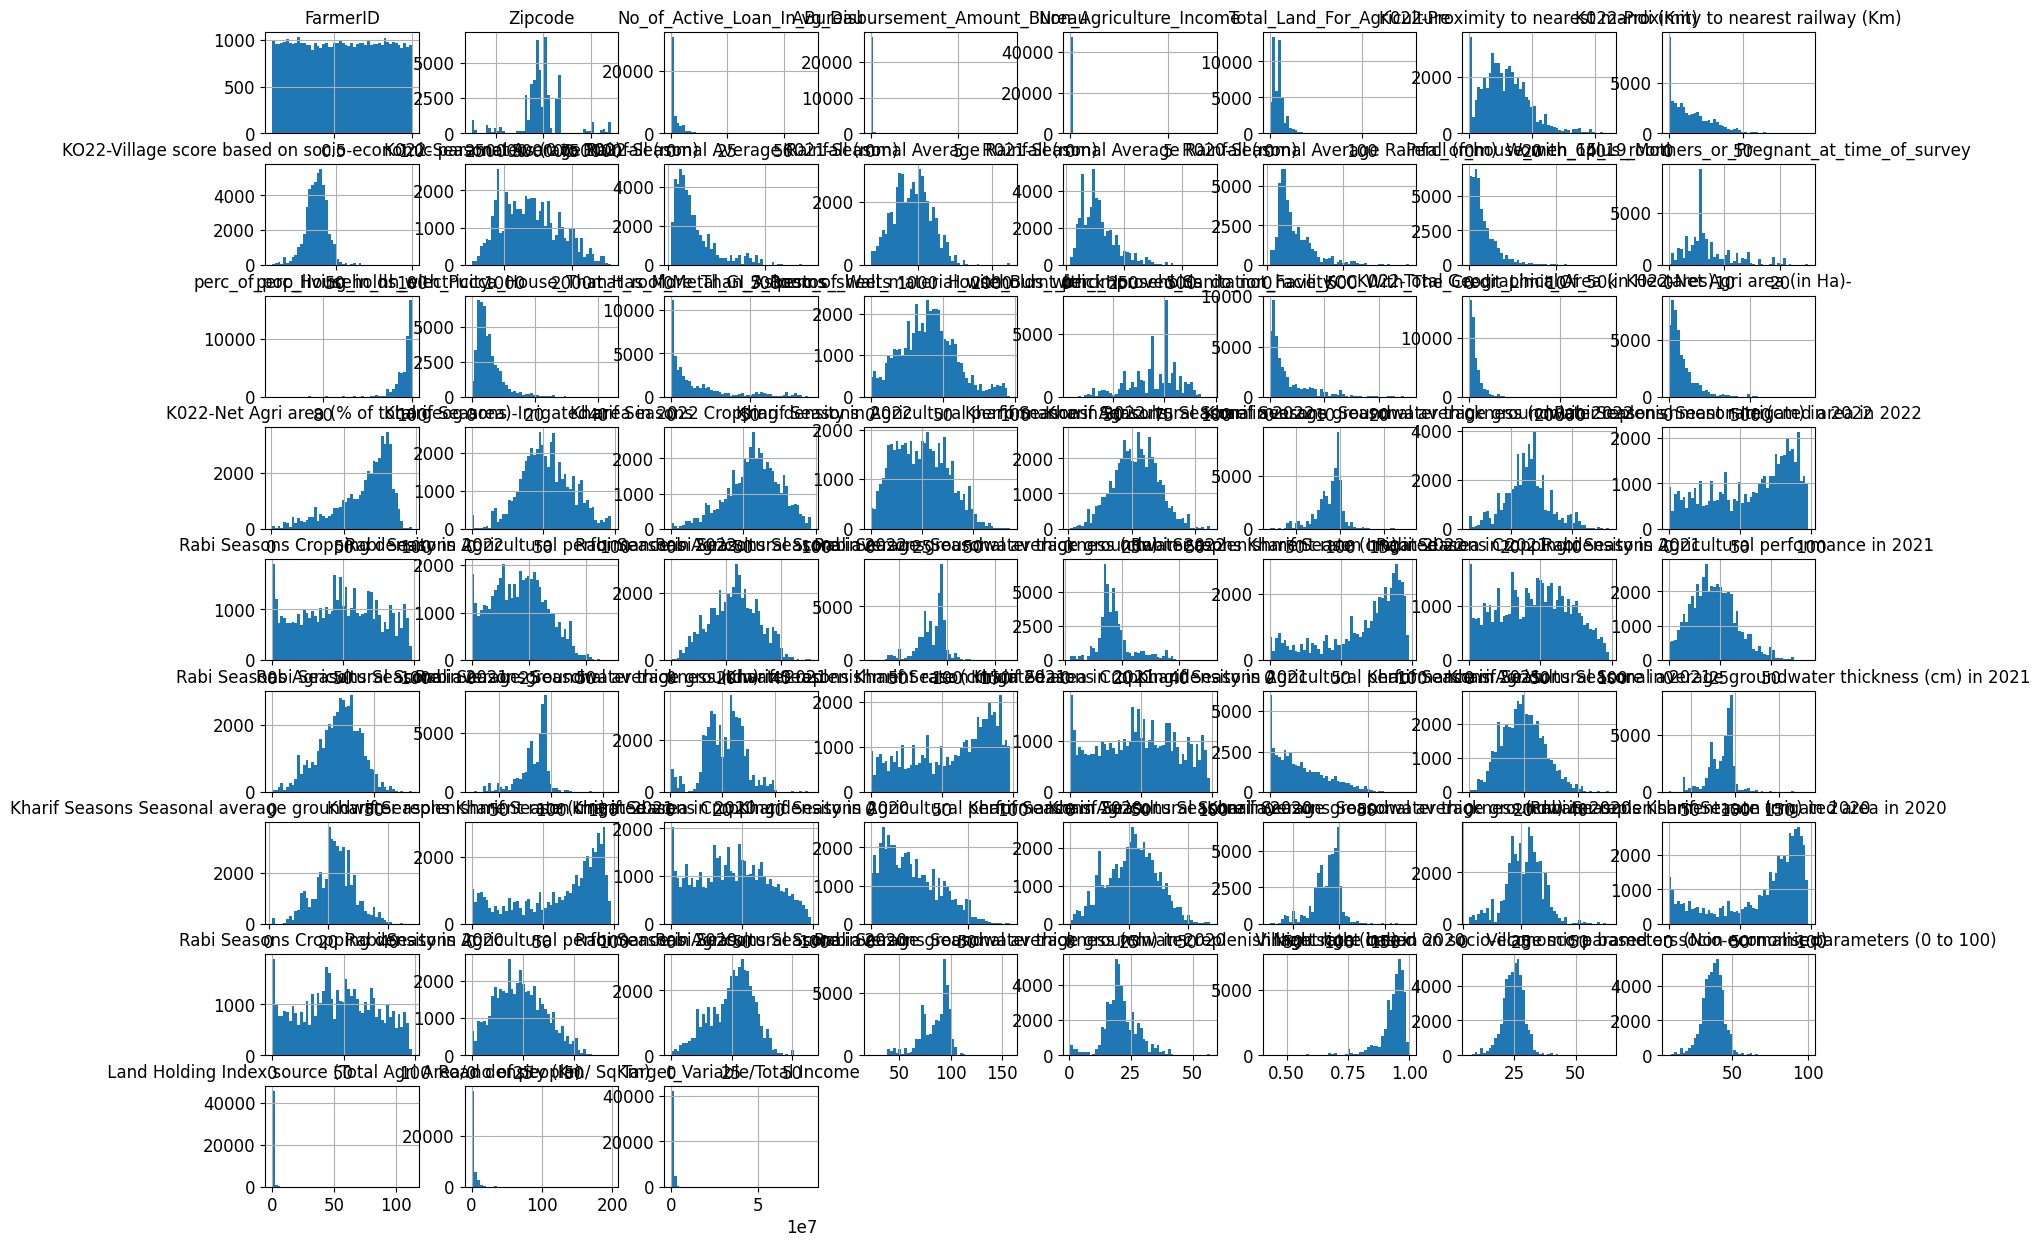

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(20,15))
plt.show()

## Features of interest

General & Demographic Features

* `Avg_Disbursement_Amount_Bureau`
* `Households_with_improved_Sanitation_Facility`

Land & Infrastructure Features

* `Road density (Km/ SqKm)`
* `Total area in hectare`
* `Total_Land_For_Agriculture`

Household Asset Percentages

* `perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k`
* `perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms`
* `Perc_of_house_with_6plus_room`
* `perc_of_pop_living_in_hh_electricity`
* `perc_of_Wall_material_with_Burnt_brick`
* `mat_roof_Metal_GI_Asbestos_sheets`

Seasonal Agricultural & Environmental Features (Kharif & Rabi)

* `K021-Ambient temperature (min & max)`
* `K021-Seasonal Average Rainfall (mm)`
* `K022-Ambient temperature (min & max)`
* `K022-Proximity to nearest mandi (Km)`
* `K022-Proximity to nearest railway (Km)`
* `K022-Seasonal Average Rainfall (mm)`
* `Kharif Seasons  Agricultural performance in 2022`
* `Kharif Seasons  Agricultural Score in 2022`
* `Kharif Seasons  Cropping density in 2022`
* `Kharif Seasons  Irrigated area in 2022`
* `Kharif Seasons  Seasonal average groundwater replenishment rate (cm) in 2022`
* `Kharif Seasons  Seasonal average groundwater thickness (cm) in 2022`
* `Kharif Seasons Agricultural performance in 2020`
* `Kharif Seasons Agricultural performance in 2021`
* `Kharif Seasons Agricultural Score in 2020`
* `Kharif Seasons Agricultural Score in 2021`
* `Kharif Seasons Cropping density in 2020`
* `Kharif Seasons Cropping density in 2021`
* `Kharif Seasons Kharif Season Irrigated area in 2020`
* `Kharif Seasons Kharif Season Irrigated area in 2021`
* `Kharif Seasons Seasonal average groundwater replenishment rate (cm) in 2020`
* `Kharif Seasons Seasonal average groundwater replenishment rate (cm) in 2021`
* `Kharif Seasons Seasonal average groundwater thickness (cm) in 2020`
* `Kharif Seasons Seasonal average groundwater thickness (cm) in 2021`
* `R020-Ambient temperature (min & max)`
* `R020-Seasonal Average Rainfall (mm)`
* `R021-Ambient temperature (min & max)`
* `R021-Seasonal Average Rainfall (mm)`
* `R022-Ambient temperature (min & max)`
* `R022-Seasonal Average Rainfall (mm)`
* `R022-Village category based on Agri parameters (Good, Average, Poor)`
* `Rabi Seasons  Season Irrigated area in 2022`
* `Rabi Seasons Agricultural performance in 2020`
* `Rabi Seasons Agricultural performance in 2021`
* `Rabi Seasons Agricultural performance in 2022`
* `Rabi Seasons Agricultural Score in 2020`
* `Rabi Seasons Agricultural Score in 2021`
* `Rabi Seasons Agricultural Score in 2022`
* `Rabi Seasons Agro Ecological Sub Zone in 2020`
* `Rabi Seasons Agro Ecological Sub Zone in 2021`
* `Rabi Seasons Agro Ecological Sub Zone in 2022`
* `Rabi Seasons Cropping density in 2020`
* `Rabi Seasons Cropping density in 2021`
* `Rabi Seasons Cropping density in 2022`
* `Rabi Seasons Kharif Season Irrigated area in 2020`
* `Rabi Seasons Kharif Season Irrigated area in 2021`
* `Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020`
* `Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2021`
* `Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2022`
* `Rabi Seasons Seasonal average groundwater thickness (cm) in 2020`
* `Rabi Seasons Seasonal average groundwater thickness (cm) in 2021`
* `Rabi Seasons Seasonal average groundwater thickness (cm) in 2022`
* `Rabi Seasons Type of soil in 2020`
* `Rabi Seasons Type of soil in 2021`
* `Rabi Seasons Type of soil in 2022`
* `Rabi Seasons Type of water bodies in hectares 2020`
* `Rabi Seasons Type of water bodies in hectares 2021`
* `Rabi Seasons Type of water bodies in hectares 2022`